Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [198]:
df=pd.read_csv('/content/Country-data.csv')
df1=pd.read_csv('/content/data-dictionary.csv')

In [199]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [200]:
df1.isnull().sum()

Column Name    0
Description    0
dtype: int64

In [201]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [202]:
df1.describe()

,Column Name,Description
count,10,10
unique,10,10
top,country,Name of the country
freq,1,1


In [203]:
df.shape

(167, 10)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [205]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  10 non-null     object
 1   Description  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [206]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [207]:
df1.columns

Index(['Column Name', 'Description'], dtype='object')

EDA:

In [208]:
print("No. of countries:",df['country'].nunique())
print('Country with highest GDP: ',df['country'][df.gdpp==df.gdpp.max()])
print('Counrty with minimum mortality rate:', df['country'][df.child_mort==2.60])
df.head()

No. of countries: 167
Country with highest GDP:  91    Luxembourg
Name: country, dtype: object
Counrty with minimum mortality rate: 68    Iceland
Name: country, dtype: object


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


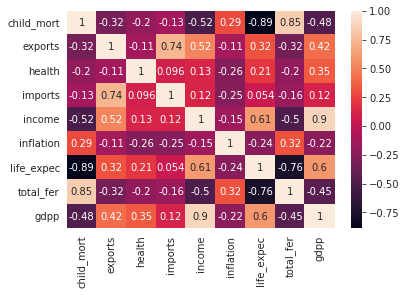

In [209]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [210]:
data = df.drop("country", axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


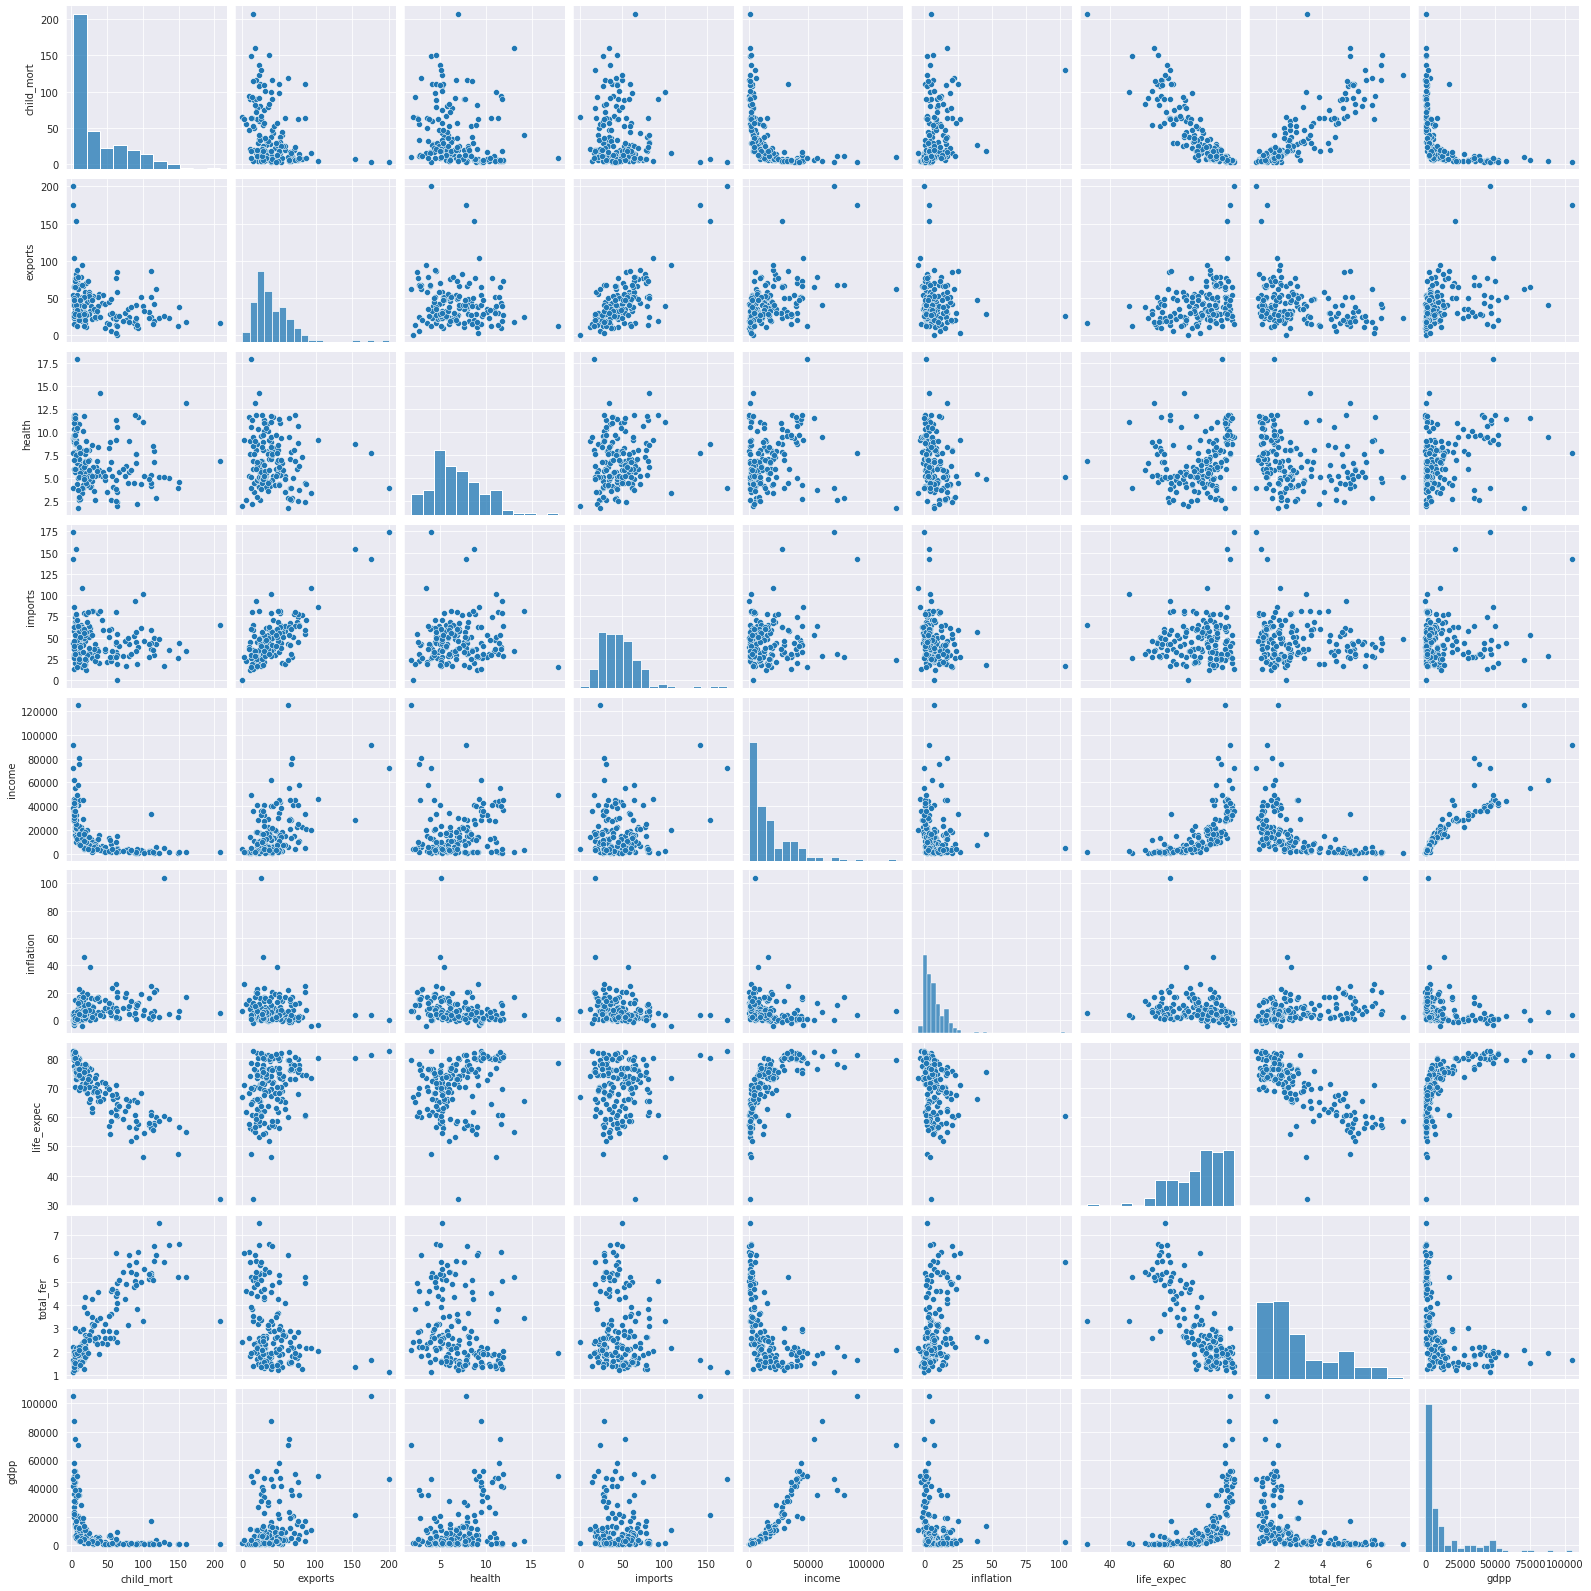

In [196]:
sns.pairplot(df)

In [211]:
print("No. of unique child death cases",data['child_mort'].nunique())

No. of unique child death cases 139


In [212]:
print("No. of unique life expectancy cases",data['life_expec'].nunique())

No. of unique life expectancy cases 127


In [213]:
print('Instances with income greater than its mean i.e.,17144:')
data['income'][data.income>17144].count()

Instances with income greater than its mean i.e.,17144:


57

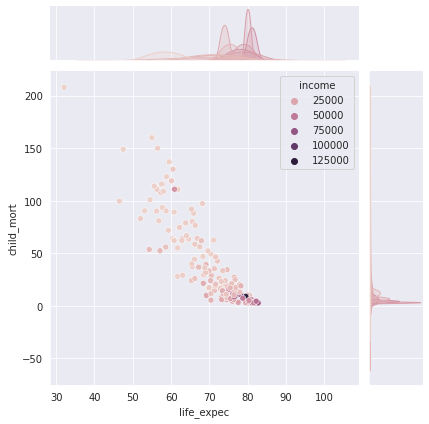

In [214]:
sns.set_style('darkgrid')
sns.jointplot(x='life_expec',y='child_mort',hue='income',data=data)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



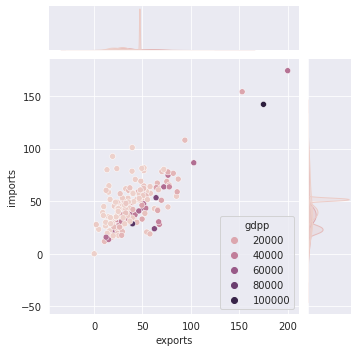

In [215]:
sns.jointplot('exports','imports',data=data,height=5,hue='gdpp')

Data normalisation:

In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
df_scaled = scaler.transform(data)
df_1=pd.DataFrame(df_scaled,columns=data.columns)
df_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


Feature reduction using PCA:

In [217]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_trans=pca.fit_transform(df_1)
print('Before applying PCA, shape of dataset',df_1.shape)
pca_trans.shape
print('After applying PCA, shape of dataset',pca_trans.shape)

Before applying PCA, shape of dataset (167, 9)
After applying PCA, shape of dataset (167, 2)


Let's plot it!

Text(0, 0.5, 'Second Principal Component')

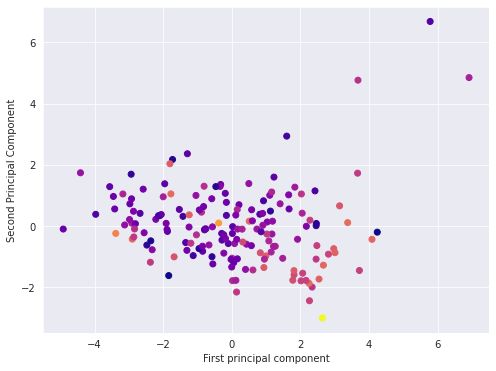

In [218]:
plt.figure(figsize=(8,6))
plt.scatter(pca_trans[:,0],pca_trans[:,1],c=data['health'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [219]:
df_pca_trans = pd.DataFrame(pca.components_,columns=data.columns)
df_pca_trans.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.419519,0.283897,0.150838,0.161482,0.398441,-0.193173,0.425839,-0.403729,0.392645
1,0.192884,0.613163,-0.243087,0.671821,0.022536,-0.008404,-0.222707,0.155233,-0.046022


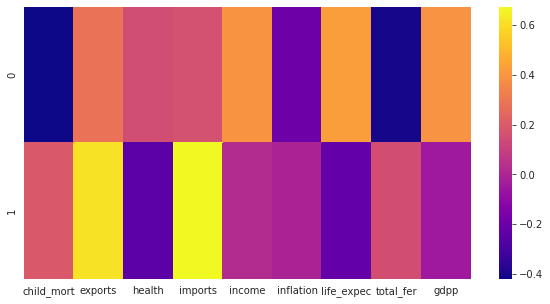

In [220]:
plt.figure(figsize=(10,5))
sns.heatmap(df_pca_trans,cmap='plasma')

Model preparation:

Preparing model without PCA 

In [221]:
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2).fit(df_1)
# kmeans.cluster_centers_


In [222]:
# kmeans.labels_

In [223]:
ks = range(1,10)
f = []

for i in ks:
    model = KMeans(n_clusters=i)
    model.fit(df_1)
    f.append(model.inertia_)

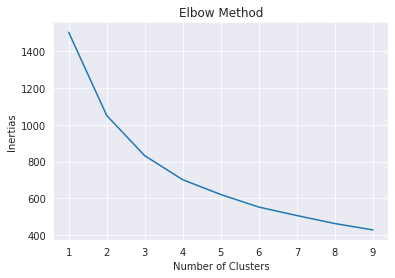

In [224]:
plt.plot(ks,f)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.title('Elbow Method')
plt.show()

In [225]:
from sklearn.pipeline import make_pipeline
import plotly.express as px
kmeans = KMeans(n_clusters=4,random_state=42)
pipeline = make_pipeline(kmeans)
pipeline.fit(df_1)

Pipeline(steps=[('kmeans', KMeans(n_clusters=4, random_state=42))])

In [226]:
clusters = pipeline.predict(df_1)
clusters

# from sklearn import metrics

# metrics.silhouette_score(df_1,clusters)

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [227]:
country = df.iloc[:,0]
country

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [228]:
result  = pd.DataFrame({'clusters':clusters,'country':country})
result

,clusters,country
0,1,Afghanistan
1,0,Albania
2,0,Algeria
3,1,Angola
4,0,Antigua and Barbuda
...,...,...
162,0,Vanuatu
163,0,Venezuela
164,0,Vietnam
165,1,Yemen


In [229]:

fig = px.choropleth(result,
                    locationmode='country names',
                    locations='country',
                    color='clusters',
                    title='Clustered by countries'
                
                   )
fig.show()


Conclusion:

Countries clustered in group 1 have weak score in socio-economic and health factors. Hence it can be concluded that with those countries which fall in cluster 1, should be focused more.

In [233]:
import joblib
model=joblib.dump(pipeline,'model_un.pkl')